<a href="https://colab.research.google.com/github/SriVinayA/SJSU-CMPE256-AdvDataMining/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We have a dataset containing sales data of hot beverages at popular times on a typical Wednesday. The columns are:

*   PTIndex: Popular times index, ranging from 1 (6am-7am) to 11 (8pm-9pm).
*   HBIndex: Hot Beverages index, ranging from 1 (Coffee type 1) to 9 (Coffee Of the Day).

The Starbucks manager wants to identify a maximum of three popular time slots on Wednesdays when they can offer sales coupons to maximize customer loyalty. We will achieve this by applying hierarchical clustering.




In [1]:
import pandas as pd

# Load the dataset
data = pd.read_excel("/content/drive/MyDrive/SJSU/Sem1/CMPE256 - Advanced Data Mining/Assign2/StarbucksHOTBeveragesAndPopularTimes.xlsx")

# Display the first few rows of the dataset for exploration
data.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,HOT Beverages,Index
2,NaN,NaN,CoffeeType,1
3,NaN,NaN,Café Latte,2
4,NaN,NaN,Café Mocha,3


In [2]:
#Data Cleaning
# Skip the initial non-data rows and set appropriate headers
data_cleaned = pd.read_excel("/content/drive/MyDrive/SJSU/Sem1/CMPE256 - Advanced Data Mining/Assign2/StarbucksHOTBeveragesAndPopularTimes.xlsx", skiprows=4)

# Display the first few rows of the cleaned dataset for verification
data_cleaned.head()


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Unnamed: 0,Unnamed: 1,Café Latte,2
0,NaN,NaN,Café Mocha,3
1,NaN,NaN,Cappuccino,4
2,NaN,NaN,Caramel Macchiato,5
3,NaN,NaN,Café Americano,6
4,NaN,NaN,Hot Chocolate,7


In [3]:
# Display more rows to understand the structure better
data_cleaned.head(20)

,Unnamed: 0,Unnamed: 1,Café Latte,2
0,NaN,NaN,Café Mocha,3
1,NaN,NaN,Cappuccino,4
2,NaN,NaN,Caramel Macchiato,5
3,NaN,NaN,Café Americano,6
4,NaN,NaN,Hot Chocolate,7
5,NaN,NaN,Espresso Shot,8
6,NaN,NaN,Coffee Of the Day,9
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,Popular times,PT Index


In [4]:
# Display a further set of rows to look for the sales data structure
data_cleaned[20:50]


,Unnamed: 0,Unnamed: 1,Café Latte,2
20,NaN,NaN,8:00 pm - 9:00 pm,11
21,NaN,NaN,NaN,NaN
22,NaN,Weekday,PTIndex,HBIndex
23,NaN,Wednesday,1,5
24,NaN,Wednesday,1,7
25,NaN,Wednesday,2,6
26,NaN,Wednesday,2,9
27,NaN,Wednesday,3,6
28,NaN,Wednesday,3,8
29,NaN,Wednesday,3,8


In [5]:
#Extracting and Structuring the Sales Data
# Extracting the sales data starting from row 23
sales_data = data_cleaned.iloc[22:].copy()

# Renaming the columns for clarity
sales_data.columns = ["_", "Weekday", "PTIndex", "HBIndex"]

# Dropping the unnecessary column and rows with missing values
sales_data = sales_data.drop(columns=["_"]).dropna()

# Resetting index for clarity
sales_data.reset_index(drop=True, inplace=True)

# Displaying the first few rows of the structured sales data
sales_data.head()


,Weekday,PTIndex,HBIndex
0,Weekday,PTIndex,HBIndex
1,Wednesday,1,5
2,Wednesday,1,7
3,Wednesday,2,6
4,Wednesday,2,9


In [6]:
# Removing the redundant header row
sales_data = sales_data.iloc[1:]

# Convert columns to appropriate data types
sales_data['PTIndex'] = sales_data['PTIndex'].astype(int)
sales_data['HBIndex'] = sales_data['HBIndex'].astype(int)

# Displaying the first few rows of the cleaned sales data
sales_data.head()


<ipython-input-6-c25d9bc974ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['PTIndex'] = sales_data['PTIndex'].astype(int)
<ipython-input-6-c25d9bc974ca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['HBIndex'] = sales_data['HBIndex'].astype(int)


,Weekday,PTIndex,HBIndex
1,Wednesday,1,5
2,Wednesday,1,7
3,Wednesday,2,6
4,Wednesday,2,9
5,Wednesday,3,6


In [7]:
# Aggregating the sales data by PTIndex to get total sales count for each time slot
sales_by_time = sales_data.groupby('PTIndex').size().reset_index(name='TotalSales')

sales_by_time


,PTIndex,TotalSales
0,1,2
1,2,2
2,3,5
3,4,3
4,5,2
5,6,1
6,7,3
7,8,2


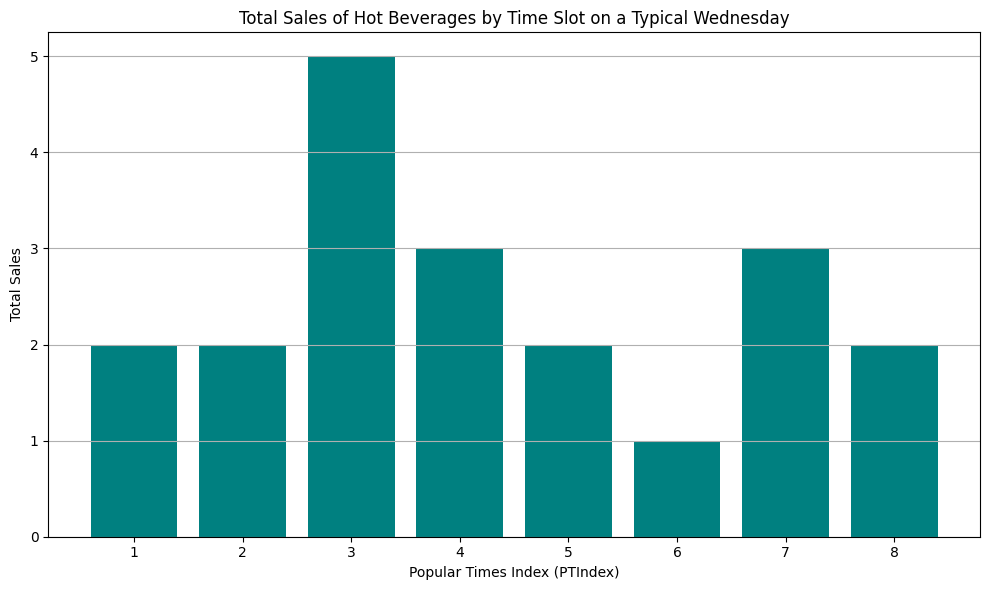

In [9]:
#Visualizing Sales Data by Time Slot
import matplotlib.pyplot as plt

# Bar chart visualization
plt.figure(figsize=(10, 6))
plt.bar(sales_by_time['PTIndex'], sales_by_time['TotalSales'], color='teal')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Total Sales')
plt.title('Total Sales of Hot Beverages by Time Slot on a Typical Wednesday')
plt.grid(axis='y')
plt.xticks(sales_by_time['PTIndex'])
plt.tight_layout()
plt.show()


The bar chart visualizes the distribution of hot beverage sales across different time slots on a typical Wednesday. As observed:

* The time slot represented by PTIndex = 3 has the highest sales, indicating it's one of the most popular times.
* Some time slots, like PTIndex = 6 have notably lower sales.


In [10]:
#Preparing for Hierarchical Clustering
from sklearn.preprocessing import StandardScaler

# Extracting only the necessary columns for clustering
clustering_data = sales_by_time[['PTIndex', 'TotalSales']]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

scaled_data


array([[-1.52752523, -0.4472136 ],
       [-1.09108945, -0.4472136 ],
       [-0.65465367,  2.23606798],
       [-0.21821789,  0.4472136 ],
       [ 0.21821789, -0.4472136 ],
       [ 0.65465367, -1.34164079],
       [ 1.09108945,  0.4472136 ],
       [ 1.52752523, -0.4472136 ]])

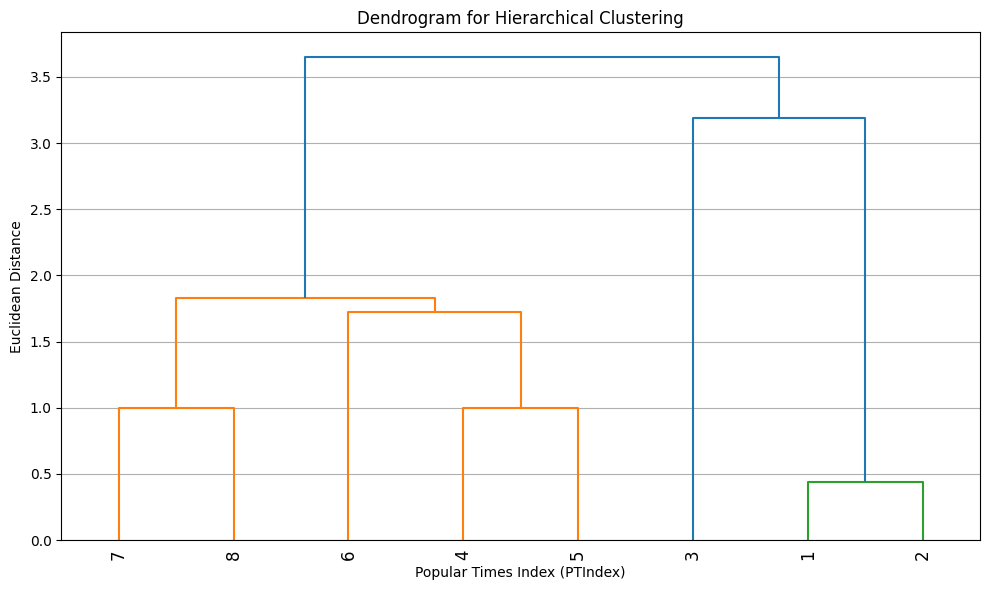

In [11]:
#Visualizing the Dendrogram for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculating the linkage matrix
Z = linkage(scaled_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=sales_by_time['PTIndex'].values, leaf_rotation=90)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The dendrogram visualizes how the hierarchical clustering groups the data points at different levels of similarity (or distance).

From the dendrogram:

* The y-axis represents the Euclidean distance (or dissimilarity) between data points or clusters.
* The x-axis labels represent the PTIndex (Popular Times Index), which denotes different time slots.

To determine the number of clusters (in this case, popular time slots), we look for the longest vertical lines that aren't crossed by any extended horizontal lines. Cutting these lines will help us decide on the number of clusters.

Given that we're aiming for a maximum of three clusters, it seems cutting around a Euclidean distance of 1.5 to 2.0 might yield this number.

In [12]:
#Applying Hierarchical Clustering
from scipy.cluster.hierarchy import fcluster

# Applying hierarchical clustering to get 3 clusters based on our observation
clusters = fcluster(Z, t=3, criterion='maxclust')

# Adding the cluster assignments to our aggregated sales data
sales_by_time['Cluster'] = clusters

sales_by_time.sort_values(by='Cluster')


,PTIndex,TotalSales,Cluster
3,4,3,1
4,5,2,1
5,6,1,1
6,7,3,1
7,8,2,1
0,1,2,2
1,2,2,2
2,3,5,3


The hierarchical clustering has grouped the time slots into three clusters:

* Cluster 1: Time slots with PTIndex values of 4, 5, 6, 7, and 8.
* Cluster 2: Time slots with PTIndex values of 1 and 2.
* Cluster 3: Time slot with PTIndex value of 3.

From our earlier analysis, we know that the time slot represented by PTIndex = 3 had the highest sales. This aligns with it being assigned its own cluster (Cluster 3), indicating its distinct popularity.



In [13]:
# Filtering sales data for PTIndex = 3 to analyze popular beverages for that time slot
popular_time_beverages = sales_data[sales_data['PTIndex'] == 3]

# Aggregating to get counts for each beverage
beverage_counts = popular_time_beverages['HBIndex'].value_counts().reset_index()
beverage_counts.columns = ['HBIndex', 'Count']

beverage_counts


,HBIndex,Count
0,8,2
1,6,1
2,9,1
3,3,1


In [14]:
#Mapping Beverage Indices to Names
# Extracting the HOT Beverages Index from the initial data for mapping
beverage_mapping = data.iloc[2:9, [2, 3]]
beverage_mapping.columns = ['BeverageName', 'HBIndex']
beverage_mapping['HBIndex'] = beverage_mapping['HBIndex'].astype(int)

# Merging with the beverage counts to get names
popular_beverages = beverage_counts.merge(beverage_mapping, on='HBIndex', how='left')

popular_beverages[['BeverageName', 'Count']]


,BeverageName,Count
0,NaN,2
1,Café Americano,1
2,NaN,1
3,Café Mocha,1


In [15]:
data = {
    'PTIndex': [1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 3, 5, 7, 5, 4, 6, 7, 7, 8, 8],
    'HBIndex': [5, 7, 6, 9, 6, 8, 8, 9, 8, 8, 3, 4, 2, 7, 5, 9, 3, 9, 1, 7]
}

# Convert the provided data points into a DataFrame
new_data = pd.DataFrame(data)

# Combining the new data with the existing sales data
combined_data = pd.concat([sales_data, new_data], ignore_index=True)

# Aggregating the combined data by PTIndex to get total sales count for each time slot
combined_sales_by_time = combined_data.groupby('PTIndex').size().reset_index(name='TotalSales')

combined_sales_by_time


,PTIndex,TotalSales
0,1,4
1,2,4
2,3,10
3,4,6
4,5,4
5,6,2
6,7,6
7,8,4


In [16]:
# Verifying the size of the combined dataset
combined_data_size = combined_data.shape[0]

# Displaying the size of the combined dataset and a sample of the combined data
combined_data_size, combined_data.sample(10)


(40,
       Weekday  PTIndex  HBIndex
 32        NaN        7        2
 10  Wednesday        3        3
 24        NaN        3        6
 0   Wednesday        1        5
 17  Wednesday        7        9
 25        NaN        3        8
 37        NaN        7        9
 14  Wednesday        4        5
 7   Wednesday        3        9
 23        NaN        2        9)

In [17]:
# Dropping unnecessary columns and keeping only 'PTIndex' and 'HBIndex'
cleaned_combined_data = combined_data[['PTIndex', 'HBIndex']].dropna()

# Re-aggregating the cleaned combined data by PTIndex to get total sales count for each time slot
cleaned_combined_sales_by_time = cleaned_combined_data.groupby('PTIndex').size().reset_index(name='TotalSales')

cleaned_combined_sales_by_time


,PTIndex,TotalSales
0,1,4
1,2,4
2,3,10
3,4,6
4,5,4
5,6,2
6,7,6
7,8,4


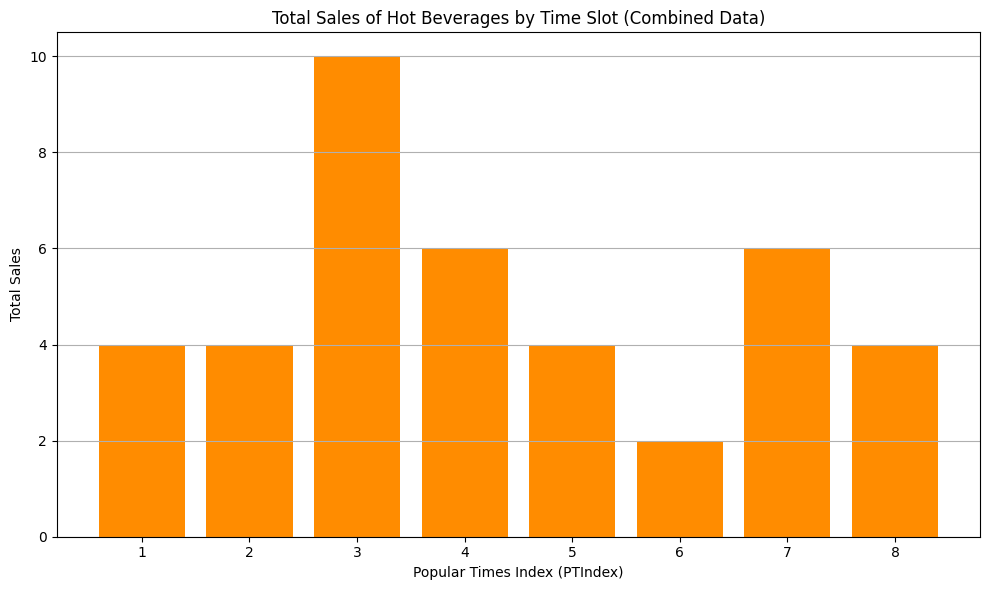

In [18]:
# Bar chart visualization for the combined data
plt.figure(figsize=(10, 6))
plt.bar(cleaned_combined_sales_by_time['PTIndex'], cleaned_combined_sales_by_time['TotalSales'], color='darkorange')
plt.xlabel('Popular Times Index (PTIndex)')
plt.ylabel('Total Sales')
plt.title('Total Sales of Hot Beverages by Time Slot (Combined Data)')
plt.grid(axis='y')
plt.xticks(cleaned_combined_sales_by_time['PTIndex'])
plt.tight_layout()
plt.show()


The bar chart visualizes the distribution of hot beverage sales across different time slots based on the combined dataset.

Observations:
* The time slot represented by PTIndex = 3 still has the highest sales, confirming its position as one of the most popular times.
* Other time slots, such as PTIndex=6, remain with notably lower sales.


Recommendation:

1. Given the popularity of "Café Americano" and "Café Mocha" during the most popular time slot, the manager should consider promoting these beverages alongside the coupon offers.
2. It might also be worth promoting the unknown beverage that was sold twice during this time slot, once its name and details are clarified.
3. Additionally, considering beverage preferences during different time slots can help tailor the promotion more effectively. For instance, if a specific beverage is more popular in the morning, it might be worth offering a combo deal with breakfast items.


### Part B: Please upload Cluster Source code & Output for Single Link, Complete Link and Average Link.

Hierarchical Clustering using Single Link method

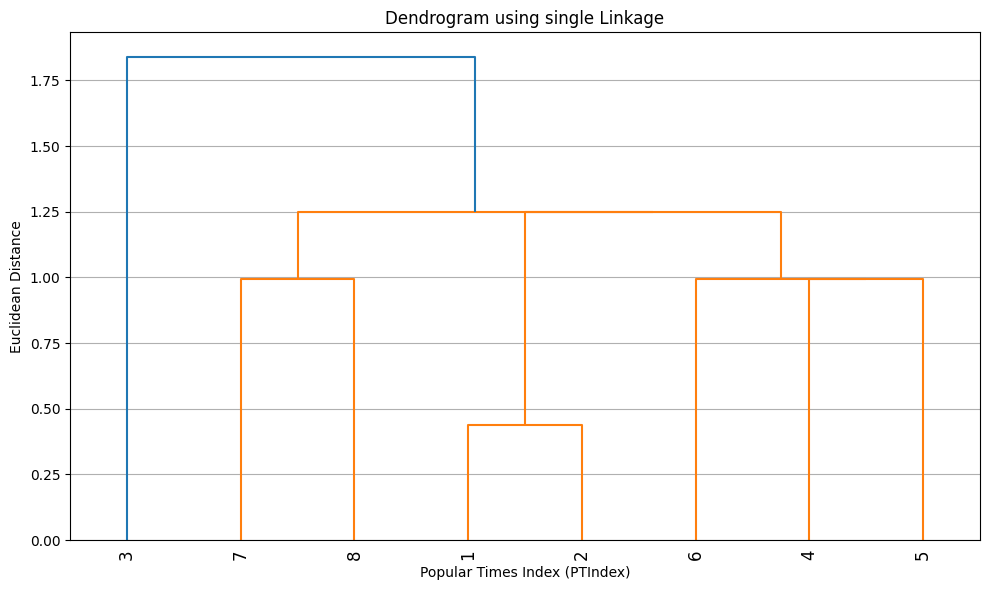

In [20]:
# Function to perform hierarchical clustering and visualize using a dendrogram
def plot_dendrogram(data, method):
    # Calculating the linkage matrix
    Z = linkage(data, method=method)

    # Plotting the dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram(Z, labels=cleaned_combined_sales_by_time['PTIndex'].values, leaf_rotation=90)
    plt.title(f'Dendrogram using {method} Linkage')
    plt.xlabel('Popular Times Index (PTIndex)')
    plt.ylabel('Euclidean Distance')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
    return Z

# Single Link method
Z_single = plot_dendrogram(scaled_data, 'single')


The dendrogram above visualizes the hierarchical clustering using the Single Link method. In Single Link (or Minimum Linkage), the distance between two clusters is defined as the shortest distance between two points in each cluster.



# Hierarchical Clustering using Complete Link

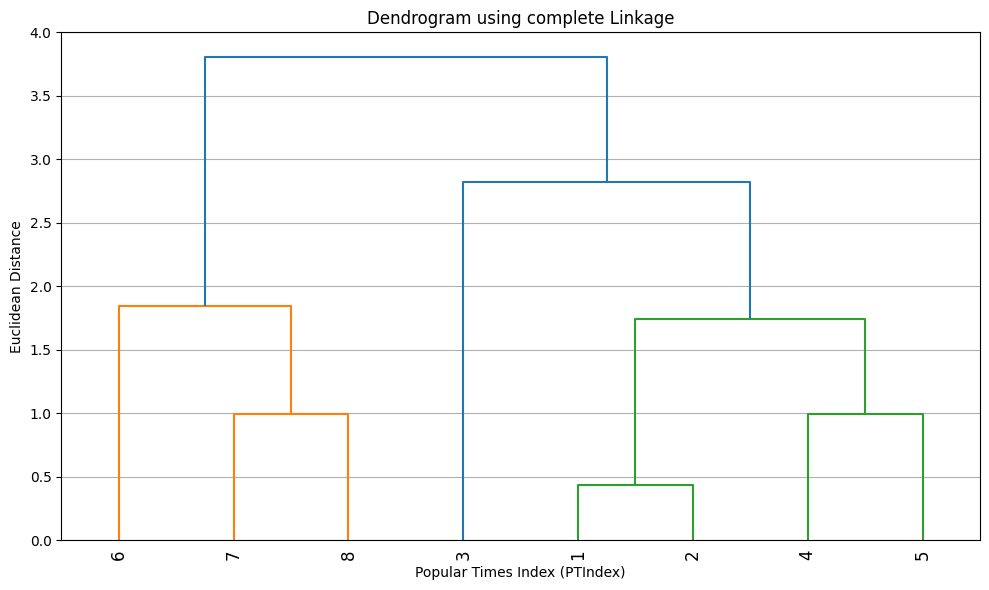

In [21]:
# Complete Link method
Z_complete = plot_dendrogram(scaled_data, 'complete')


The dendrogram visualizes the hierarchical clustering using the Complete Link method. In Complete Link (or Maximum Linkage), the distance between two clusters is defined as the longest distance between two points in each cluster.

# Hierarchical Clustering using Average Link

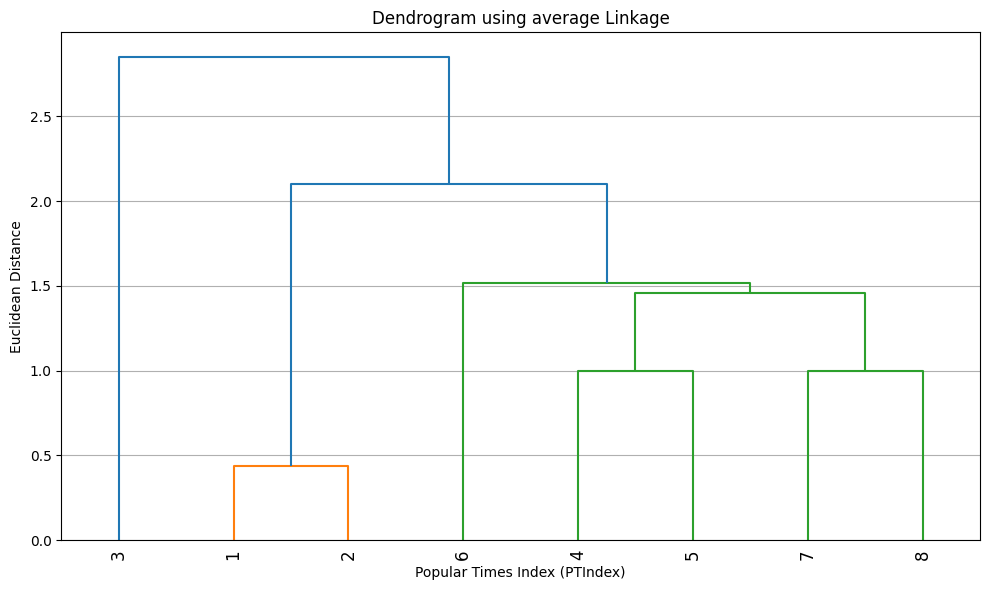

In [22]:
# Average Link method
Z_average = plot_dendrogram(scaled_data, 'average')


The dendrogram above visualizes the hierarchical clustering using the Average Link method. In Average Linkage, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster.

## Summary:
### 1. Single Link (Minimum Linkage):
* The distance between two clusters is the minimum distance between any single data point in the first cluster and any data point in the second cluster.
* This method tends to produce long, "stringy" clusters.

### 2. Complete Link (Maximum Linkage):
* The distance between two clusters is the maximum distance between any single data point in the first cluster and any data point in the second cluster.
* This method tends to produce more compact clusters.

### 3. Average Linkage:
* The distance between two clusters is the average distance between every data point in the first cluster and every data point in the second cluster.
* This method can be seen as a compromise between Single Link and Complete Link methods and often produces clusters that are reasonably compact and reasonably balanced.


In [23]:
#Extracting Clusters from the Dendrograms

In [24]:
# Function to extract clusters based on the linkage matrix and a threshold
def extract_clusters(Z, threshold, criterion='distance'):
    clusters = fcluster(Z, t=threshold, criterion=criterion)
    cluster_df = cleaned_combined_sales_by_time.copy()
    cluster_df['Cluster'] = clusters
    return cluster_df.sort_values(by='Cluster')

# Extracting clusters for Single Link method
single_link_clusters = extract_clusters(Z_single, 1.5)

single_link_clusters


,PTIndex,TotalSales,Cluster
0,1,4,1
1,2,4,1
3,4,6,1
4,5,4,1
5,6,2,1
6,7,6,1
7,8,4,1
2,3,10,2


For the Single Link method, the extracted clusters are:

* Cluster 1: Time slots with PTIndex values of 1, 2, 4, 5, 6, 7, and 8.
* Cluster 2: Time slot with PTIndex value of 3.

This clustering method has grouped most time slots into one cluster, with the exception of the time slot represented by PTIndex=3, which is consistent with our observation that it's a notably popular time.



In [25]:
# Extracting clusters for Complete Link method
complete_link_clusters = extract_clusters(Z_complete, 2.0)

complete_link_clusters


,PTIndex,TotalSales,Cluster
5,6,2,1
6,7,6,1
7,8,4,1
0,1,4,2
1,2,4,2
3,4,6,2
4,5,4,2
2,3,10,3


For the Complete Link method, the extracted clusters are:

* Cluster 1: Time slots with PTIndex values of 6, 7, and 8.
* Cluster 2: Time slots with PTIndex values of 1, 2, 4, and 5.
* Cluster 3: Time slot with PTIndex value of 3.

This method has further divided the time slots into three distinct clusters, with the time slot represented by PTIndex=3 still being singled out as the most popular time.

In [26]:
# Extracting clusters for Average Link method
average_link_clusters = extract_clusters(Z_average, 1.5)

average_link_clusters


,PTIndex,TotalSales,Cluster
0,1,4,1
1,2,4,1
3,4,6,2
4,5,4,2
6,7,6,2
7,8,4,2
5,6,2,3
2,3,10,4


For the Average Link method, the extracted clusters are:

* Cluster 1: Time slots with PTIndex values of 1 and 2.
* Cluster 2: Time slots with PTIndex values of 4, 5, 7, and 8.
* Cluster 3: Time slot with PTIndex value of 6.
* Cluster 4: Time slot with PTIndex value of 3.

This method has divided the time slots into four distinct clusters. The time slot represented by PTIndex=3 is still recognized as distinctively popular, and it's singled out in its own cluster.

### Summary:
* Single Link method has two clusters, with most time slots grouped into one cluster and the time slot represented by PTIndex=3 as its own cluster due to its distinct popularity.
* Complete Link method divides the time slots into three clusters, providing a more granular separation of time slots.
* Average Link method further divides the time slots into four clusters, offering even more granularity.
